In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement du dataset
file_path = 'drug_consumption.data'
df = pd.read_csv(file_path)

# On affiches les stats et on fait une preview
#df.info(), df.head()

In [2]:
import numpy as np
columns = df.columns

# Mapping des classes de consommation à des valeurs continues (on transforme les données discrètes en continues)
consumption_map = {
    "CL0": 0, "CL1": 1, "CL2": 2, "CL3": 3, "CL4": 4, "CL5": 5, "CL6": 6
}
drug_columns = columns[13:]  # de ALCOHOL à VSA

NORMALIZE = False  # Flag pour normaliser les données (on normalise si on veut comparer les coéfficients entre drogues)

# Convertir les colonnes de consommation
for col in drug_columns:
    df[col] = df[col].map(consumption_map)
    if NORMALIZE:
        df[col] = df[col] - np.mean(df[col])  # Centrer les données
        df[col] = df[col]/ np.std(df[col])  # Normaliser les données

# Convertir les colonnes numériques en float
for col in columns[1:13]:
    df[col] = pd.to_numeric(df[col], errors='coerce') #(coerce pour éviter les erreurs de conversion, ça mettra NaN si la conversion échoue)

#! **********************************************************************************************
# plt.figure(figsize=(15, 10)) # On règle la taille des graphs                                 #! *
# df[drug_columns].boxplot(rot=90)                                                             #! *
# plt.title('Boxplot des consommations de drogues')                                            #! *
# plt.xlabel('Drogues')                                                                        #! *
# plt.ylabel('Consommation normalisée')                                                        #! *
# plt.tight_layout()                                                                           #! *
# On vas pas l'utiliser car les données sont en 7 catégories, donc le boxplot n'est pas pertinent
#! **********************************************************************************************


# Vérification rapide après transformation
df[drug_columns].describe() # on affiche le nombre de valeurs, la moyenne, l'écart-type, les min, max et les quartiles



,ALCOHOL,AMPHET,AMYL,BENZOS,CAFF,CANABIS,CHOC,COKE,CRACK,ECSTASY,HEROIN,KETAMINE,LEGALH,LSD,METH,MUSHROOMS,NICOTINE,SEMER,VSA
count,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,4.635013,1.340584,0.606897,1.465252,5.483820,2.989390,5.106631,1.161273,0.297613,1.314058,0.374005,0.569231,1.355968,1.061538,0.826525,1.187268,3.200531,0.009549,0.433422
std,1.331253,1.783587,1.064210,1.867275,1.114648,2.287438,1.089315,1.513031,0.837053,1.647567,1.034779,1.220015,1.789647,1.491103,1.646632,1.466341,2.413932,0.159331,0.962375
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,5.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000,6.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
75%,6.000000,2.000000,1.000000,3.000000,6.000000,5.000000,6.000000,2.000000,0.000000,3.000000,0.000000,0.000000,3.000000,2.000000,0.000000,2.000000,6.000000,0.000000,0.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,4.000000,6.000000


Liste des drogues : ['ALCOHOL', 'AMPHET', 'AMYL', 'BENZOS', 'CAFF', 'CANABIS', 'CHOC', 'COKE', 'CRACK', 'ECSTASY', 'HEROIN', 'KETAMINE', 'LEGALH', 'LSD', 'METH', 'MUSHROOMS', 'NICOTINE', 'VSA']


<Figure size 640x480 with 0 Axes>

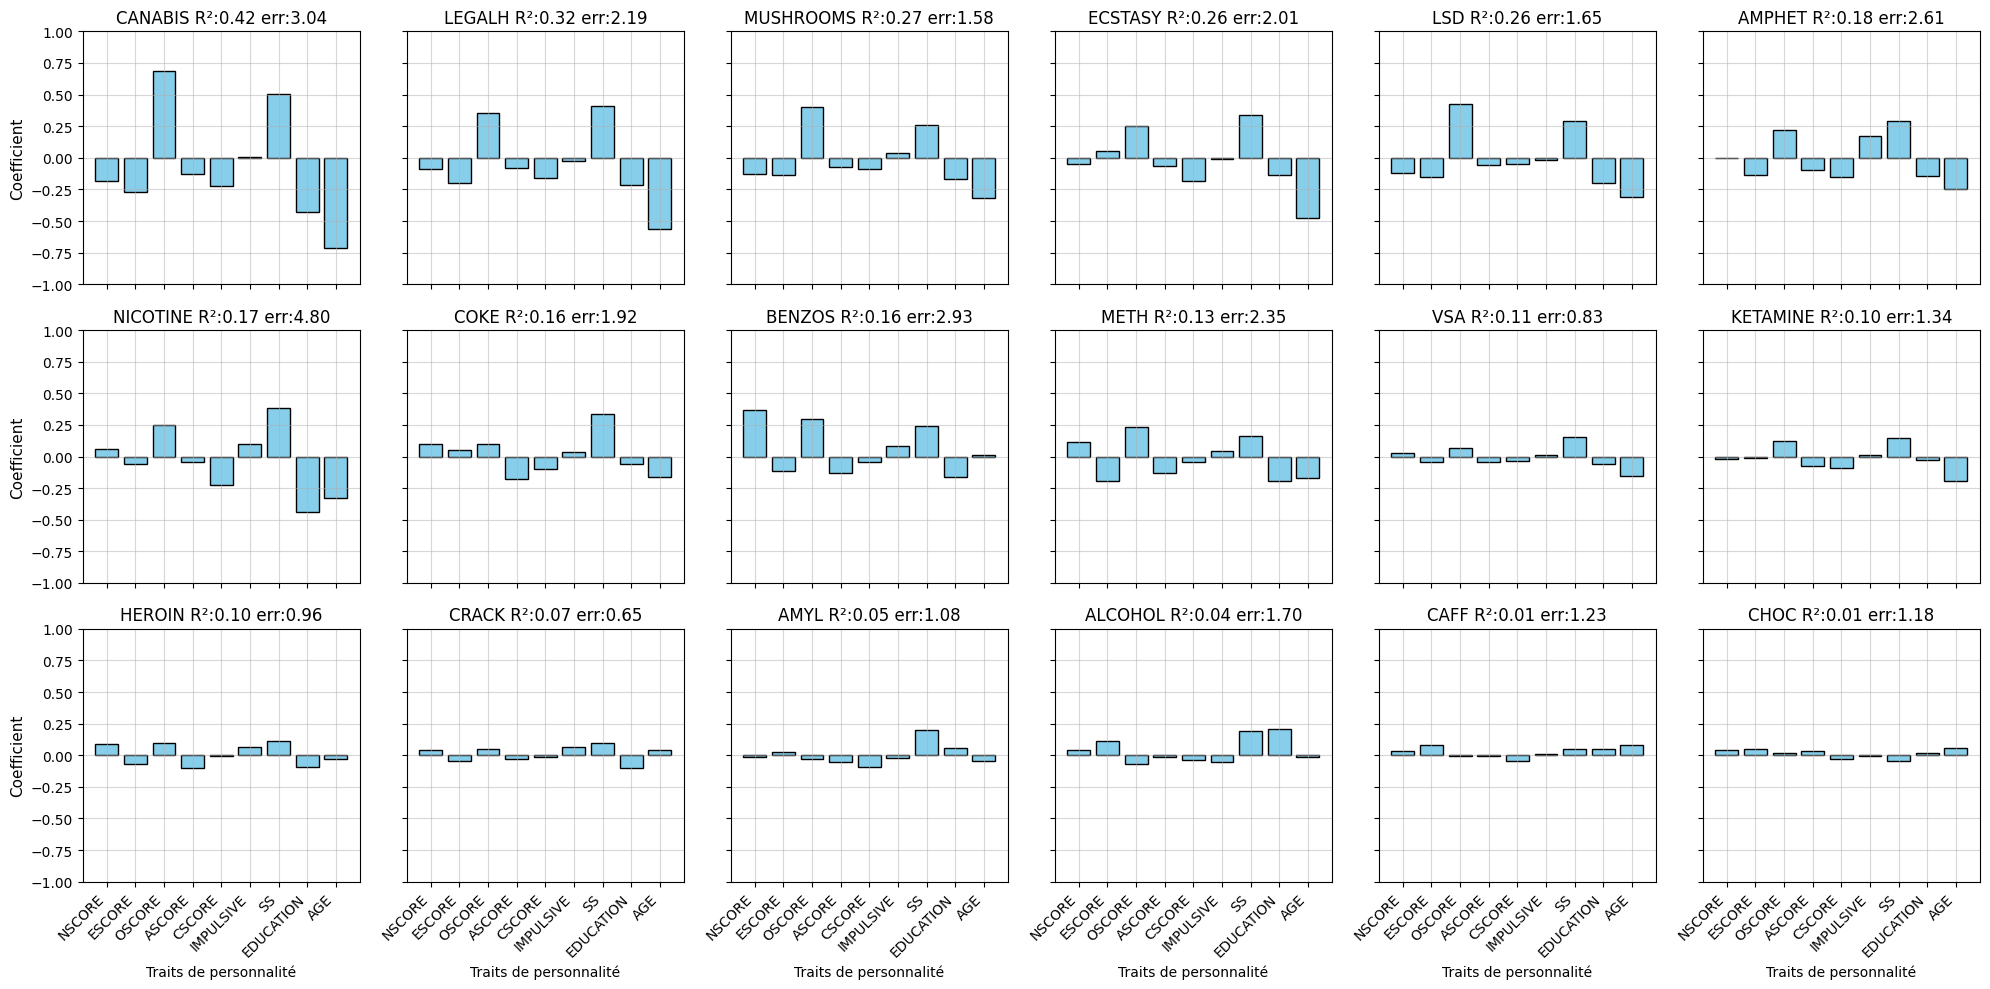

<Figure size 640x480 with 0 Axes>

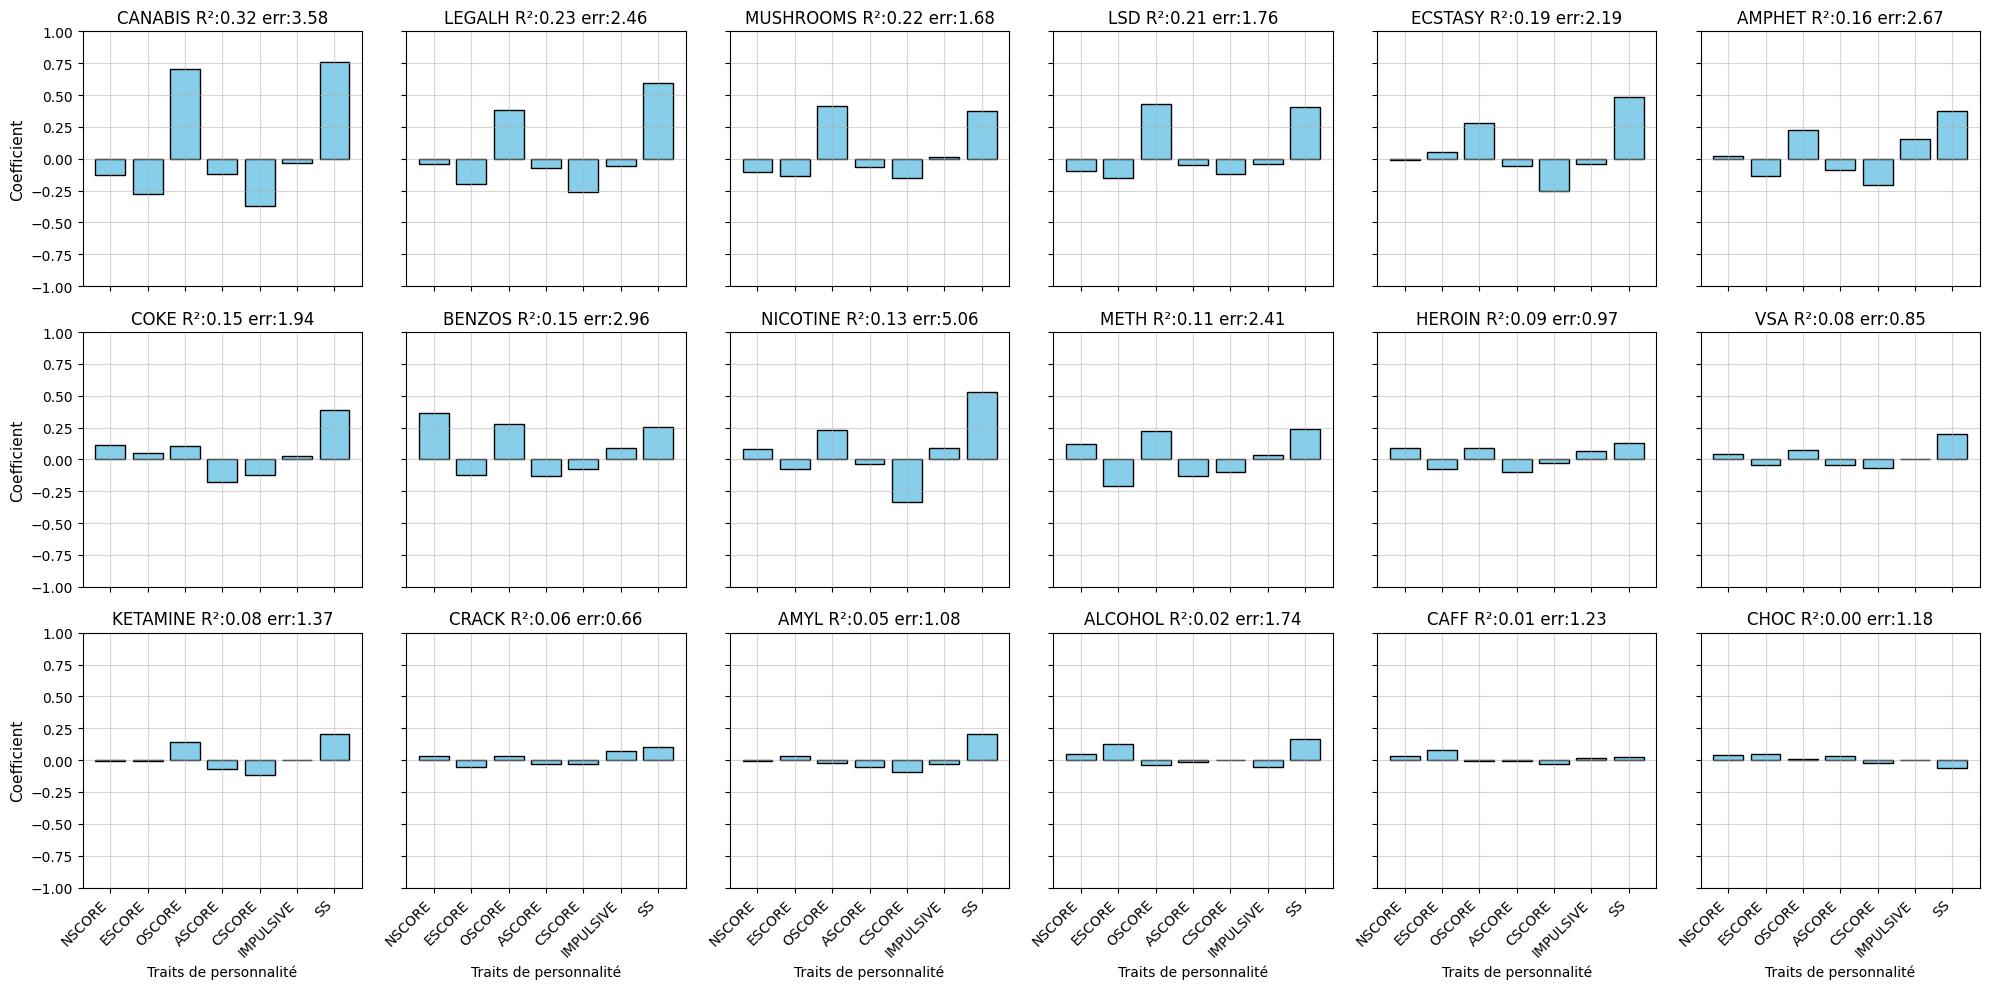

<Figure size 640x480 with 0 Axes>

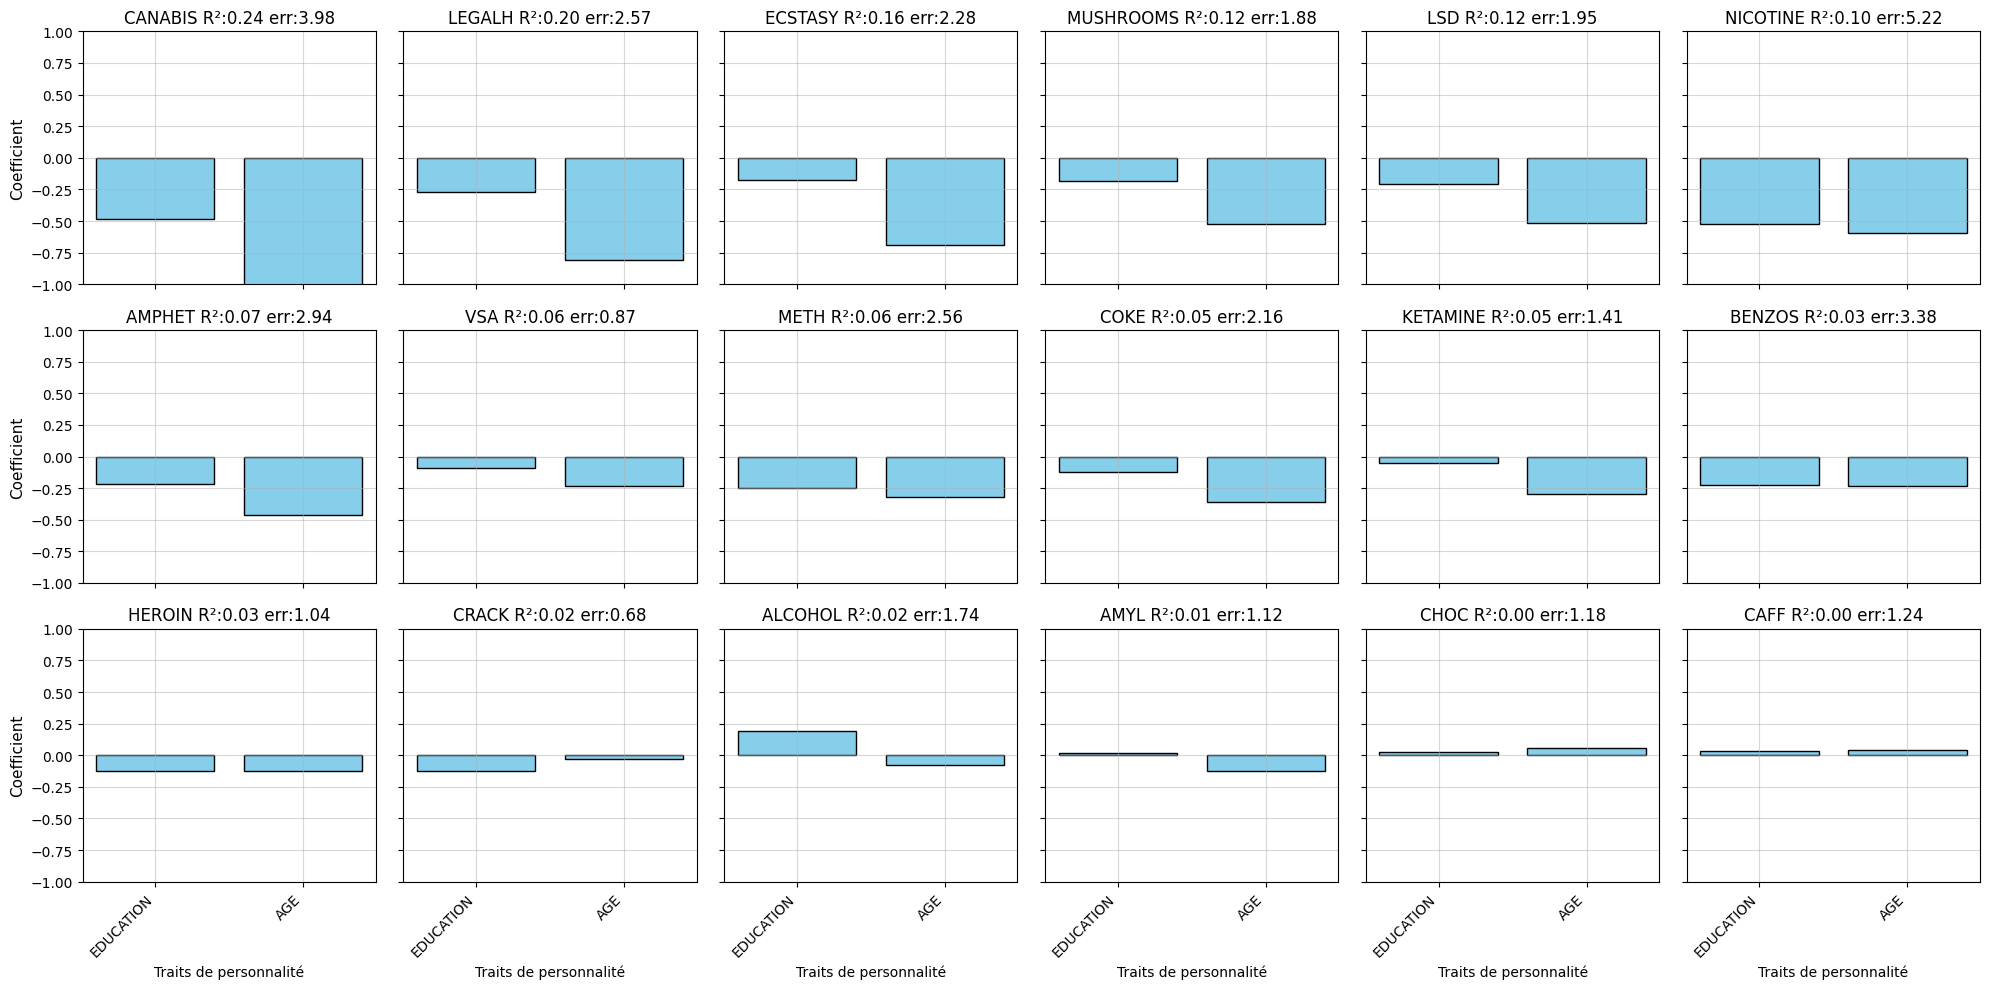

<Figure size 640x480 with 0 Axes>

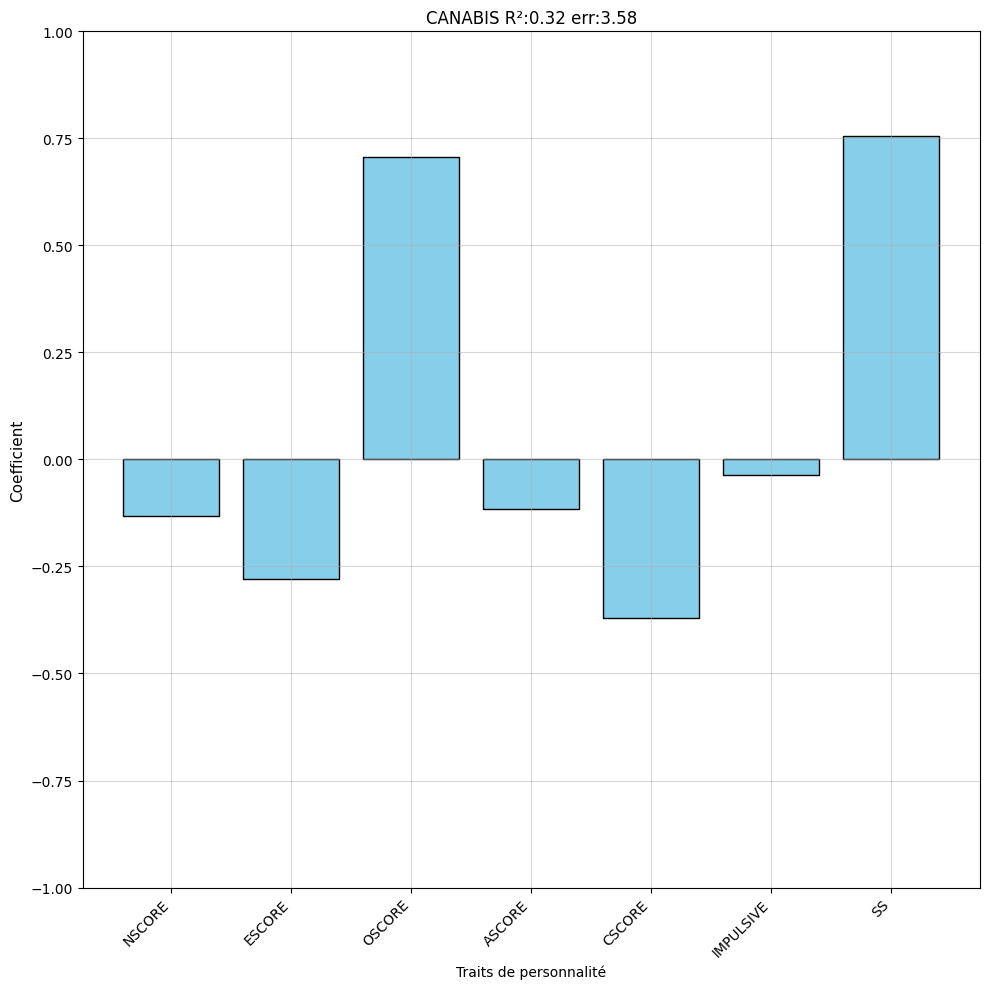

In [3]:
def regression(y_column:str,X_columns:list):

    # On met en valeur à retrouver la consommation de la drogue y_column
    y = df[y_column]

    # Indépendantes : traits de personnalité
    X = df[X_columns]

    # On ajoute une constante pour le biais
    x_transform = np.hstack([X, np.ones((X.shape[0], 1))])

    # On a les coefficients de la régression linéaire
    # On utilise la méthode des moindres carrés
    a = np.linalg.solve(x_transform.T@x_transform, x_transform.T@y)

    # Prédictions
    y_pred = x_transform @ a

    # Erreur quadratique moyenne
    mse = np.mean((y - y_pred) ** 2)

    # R²
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    ss_res = np.sum((y - y_pred) ** 2)
    r_squared = 1 - (ss_res / ss_tot)

    return r_squared, mse, pd.Series(a[:-1], index=X_columns)

DRUGS = df.columns[13:][df.columns[13:] != "SEMER"]  
print("Liste des drogues :", DRUGS.tolist())
abs_col = 6
regressions = [
    [f'./image_matplotlib/regression_results_psychosocio_{abs_col}.png',["NSCORE", "ESCORE", "OSCORE", "ASCORE", "CSCORE", "IMPULSIVE", "SS","EDUCATION","AGE"]],
    [f'./image_matplotlib/regression_results_psycho_{abs_col}.png',["NSCORE", "ESCORE", "OSCORE", "ASCORE", "CSCORE", "IMPULSIVE", "SS"]],
    [f'./image_matplotlib/regression_results_socio_{abs_col}.png',["EDUCATION","AGE"]]
]

for file_name, columns in regressions:
    plt.clf()
    resultat = []

    # On effectue la régression pour chaque drogue
    for drug in DRUGS:
        if drug == "SEMER":
            continue
        # R2, error, coeffs = regression(drug,["NSCORE", "ESCORE", "OSCORE", "ASCORE", "CSCORE", "IMPULSIVE", "SS","EDUCATION","AGE"])
        R2, error, coeffs = regression(drug,columns)
        resultat.append([drug,R2,error,coeffs])

    # Tri des résultats par R²
    sorted_resultat = sorted(resultat, key=lambda x:x[1], reverse=True)

    nb_drogues = len(sorted_resultat)
    cols = min(abs_col, nb_drogues)  # Nombre de colonnes pour l'affichage
    fig, axs = plt.subplots(nb_drogues//cols , cols, figsize=(20, 10))

    # Affichage des résultats
    for i,elt in enumerate(sorted_resultat):

        # print(elt[0],":")
        # print("R2 ",elt[1])
        # print("Erreur ",elt[2])
        # print("coeffs")
        # print(elt[3])
        # print()
        ax = axs[i // cols, i % cols]
        ax.bar(elt[3].index, elt[3].values, color='skyblue', edgecolor='black')
        ax.set_xticks(elt[3].index)
        ax.set_xticklabels(elt[3].index, rotation=45, ha='right', fontsize=10)
        ax.set_title(f"{elt[0]} R²:{elt[1]:.2f} err:{elt[2]:.2f}")
        ax.set_xlabel('Traits de personnalité')
        ax.set_ylabel('Coefficient', fontsize=11)
        ax.set_ylim(-1, 1)
        ax.grid(True, alpha=0.5)

    for i,ax in enumerate(axs.flat):
        if i >= len(sorted_resultat):
            ax.set_visible(False)  # Masquer les axes inutilisés
        else:
            ax.label_outer()  # Ne pas afficher les labels des axes intérieurs

    plt.tight_layout() # recalcule des positions des graphs pour une meilleur mise en page
    plt.savefig(file_name, dpi=300) # On sauvegarde l'image
    plt.show()

plt.clf()  
R2, error, coeffs = regression("CANABIS", ["NSCORE", "ESCORE", "OSCORE", "ASCORE", "CSCORE", "IMPULSIVE", "SS"])

plt.figure(figsize=(10, 10))  # Taille du graphique

plt.bar(coeffs.index, coeffs.values, color='skyblue', edgecolor='black')
plt.xticks(coeffs.index, rotation=45, ha='right', fontsize=10)
plt.title(f"CANABIS R²:{R2:.2f} err:{error:.2f}")
plt.xlabel('Traits de personnalité')
plt.ylabel('Coefficient', fontsize=11)
plt.ylim(-1, 1)
plt.grid(True, alpha=0.5)
plt.tight_layout()  # recalcule des positions des graphs pour une meilleur mise en page
plt.savefig('./image_matplotlib/regression_results_canabis.png', dpi=300)  # On sauvegarde l'image
plt.show()  # Affiche le graphique final

In [4]:


DRUGS = df.columns[13:]
print("Liste des drogues :", DRUGS.tolist())

resultat = []

# On effectue la régression pour chaque drogue
for drug in DRUGS:
    # R2, error, coeffs = regression(drug,["NSCORE", "ESCORE", "OSCORE", "ASCORE", "CSCORE", "IMPULSIVE", "SS","EDUCATION","AGE"])
    R2, error, coeffs = regression(drug,["EDUCATION","AGE"])
    resultat.append([drug,R2,error,coeffs])

# Tri des résultats par R²
sorted_resultat = sorted(resultat, key=lambda x:x[1], reverse=True)

nb_drogues = len(sorted_resultat)

#fig, axs = plt.subplots(nb_drogues//4 +1, 4, figsize=(20, 27))

# Affichage des résultats
for i,elt in enumerate(sorted_resultat):

    print(elt[0],":")
    print("R2 ",elt[0])
    print("Erreur ",elt[2])
    print("coeffs")
    print(elt[3])
    print()

#     ax = axs[i // 4, i % 4]
#     ax.bar(elt[3].index, elt[3].values, color='skyblue', edgecolor='black')
#     ax.set_xticks(elt[3].index)
#     ax.set_xticklabels(elt[3].index, rotation=45, ha='right', fontsize=10)
#     ax.set_title(f"{elt[0]} (R²={elt[1]:.2f}, erreur={elt[2]:.2f})")
#     ax.set_xlabel('Traits de personnalité')
#     ax.set_ylabel('Coefficient', fontsize=11)
#     ax.set_ylim(-1, 1)
#     ax.grid(True, alpha=0.5)

# for i,ax in enumerate(axs.flat):
#     if i >= len(sorted_resultat):
#         ax.set_visible(False)  # Masquer les axes inutilisés
#     else:
#         ax.label_outer()  # Ne pas afficher les labels des axes intérieurs

# plt.tight_layout() # recalcule des positions des graphs pour une meilleur mise en page
# plt.savefig('./image_matplotlib/regression_results_social.png', dpi=300) # On sauvegarde l'image



Liste des drogues : ['ALCOHOL', 'AMPHET', 'AMYL', 'BENZOS', 'CAFF', 'CANABIS', 'CHOC', 'COKE', 'CRACK', 'ECSTASY', 'HEROIN', 'KETAMINE', 'LEGALH', 'LSD', 'METH', 'MUSHROOMS', 'NICOTINE', 'SEMER', 'VSA']
CANABIS :
R2  CANABIS
Erreur  3.982565791794239
coeffs
EDUCATION   -0.480254
AGE         -1.081184
dtype: float64

LEGALH :
R2  LEGALH
Erreur  2.570690438876448
coeffs
EDUCATION   -0.274368
AGE         -0.808285
dtype: float64

ECSTASY :
R2  ECSTASY
Erreur  2.284229143101067
coeffs
EDUCATION   -0.175607
AGE         -0.691587
dtype: float64

MUSHROOMS :
R2  MUSHROOMS
Erreur  1.882675745712701
coeffs
EDUCATION   -0.185443
AGE         -0.521480
dtype: float64

LSD :
R2  LSD
Erreur  1.9535960703887778
coeffs
EDUCATION   -0.203654
AGE         -0.513693
dtype: float64

NICOTINE :
R2  NICOTINE
Erreur  5.221792214623795
coeffs
EDUCATION   -0.523964
AGE         -0.593981
dtype: float64

AMPHET :
R2  AMPHET
Erreur  2.9429929360730838
coeffs
EDUCATION   -0.220916
AGE         -0.463094
dtype: float

<BarContainer object of 5 artists>

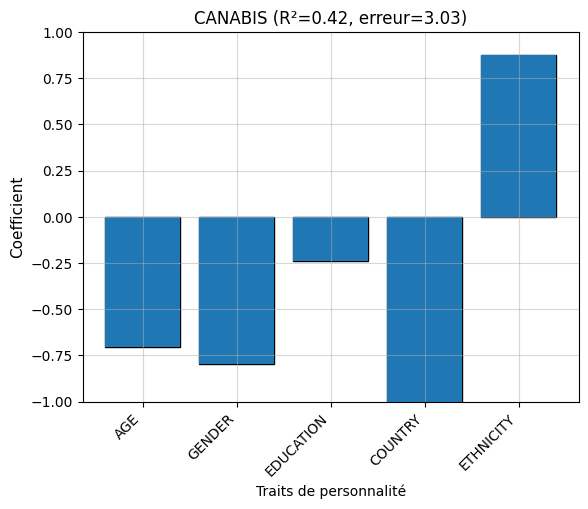

In [5]:

current_drug = "CANABIS"
analized_column = ["AGE","GENDER","EDUCATION","COUNTRY","ETHNICITY"]
r2,msre,coeffs = regression(current_drug,analized_column)
plt.bar(coeffs.index, coeffs.values, color='skyblue', edgecolor='black')
plt.xticks(coeffs.index)
plt.xticks(coeffs.index, rotation=45, ha='right', fontsize=10)
plt.title(f"{current_drug} (R²={r2:.2f}, erreur={msre:.2f})")
plt.xlabel('Traits de personnalité')
plt.ylabel('Coefficient', fontsize=11)
plt.ylim(-1, 1)
plt.grid(True, alpha=0.5)
plt.bar(coeffs.index, coeffs.values)

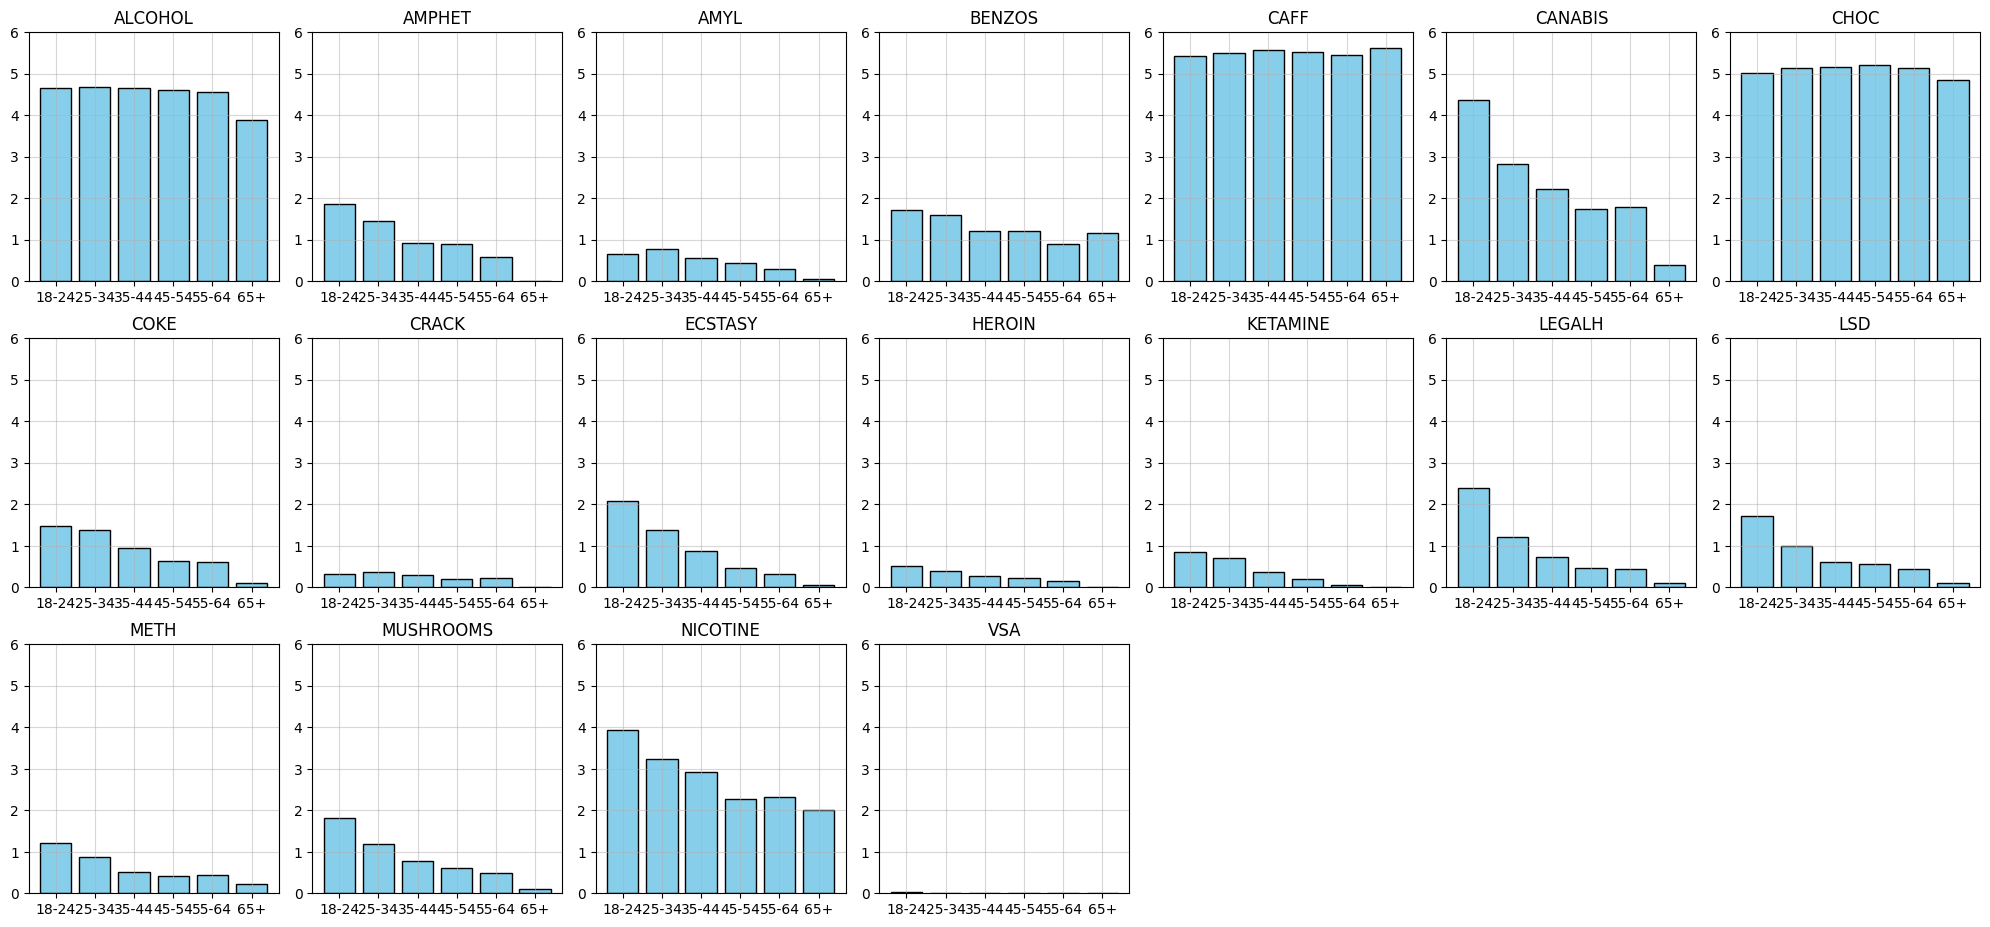

In [7]:
DRUGS
X = df.to_numpy()

ages = np.unique(X[:,1])

cols = 7
fig, axs = plt.subplots(len(DRUGS) // cols + 1,cols, figsize=(20,10))
for i, ax in enumerate(axs.flatten()):
    if i < len(DRUGS):
        resultat = []
        for age in ages:
            resultat.append(np.mean(X[np.where(X[:,1] == age)][:,13+i]))
        ax.bar(["18-24","25-34","35-44","45-54","55-64","65+"], resultat, color='skyblue', edgecolor='black')
        ax.set_title(DRUGS[i])
        ax.set_ylim([0,6])
        ax.grid(True, alpha=0.5)
    else:
        ax.set_visible(False)
#fig.suptitle("Moyenne de consommation en fonction de l'age", fontsize=20)
fig.tight_layout()

fig.subplots_adjust(top=0.9)
fig.savefig('./image_matplotlib/moyenne_conso_age.png', dpi=300)

(1885, 19)
Labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


<Figure size 1000x800 with 0 Axes>

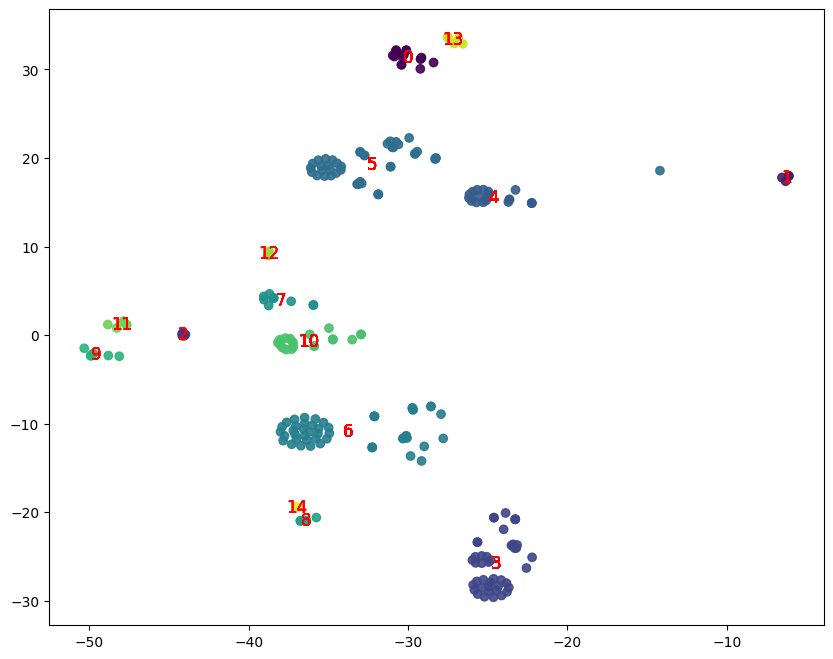

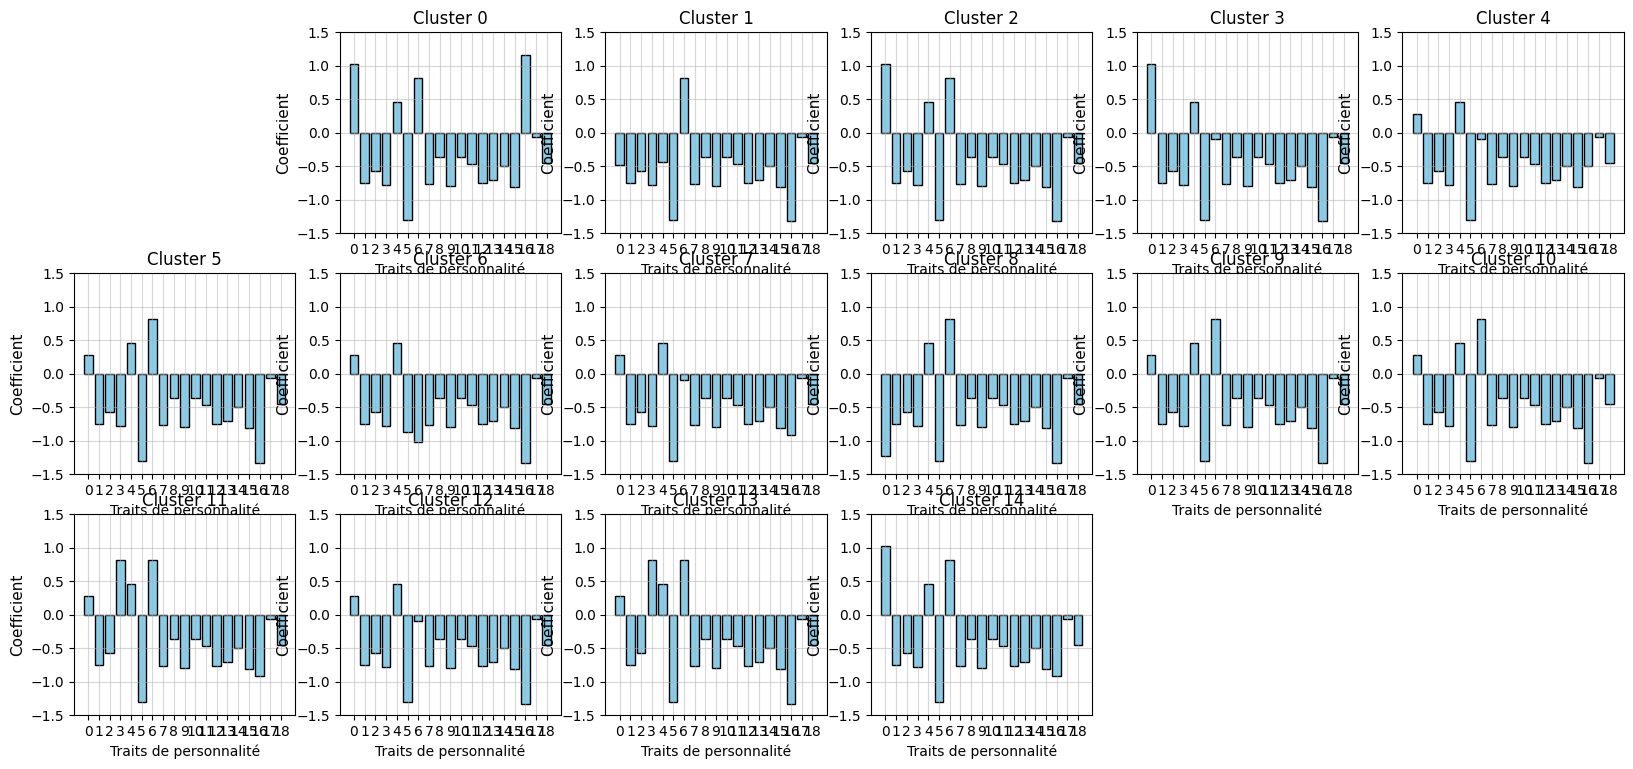

In [22]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from copy import deepcopy

X = df.to_numpy()
X = X[:, 13:]  # On enlève la première colonne (index)
print(X.shape)

X = StandardScaler().fit_transform(X)  # Normalisation des données
pca = TSNE(n_components=2).fit_transform(X)  
X_dim = pca  # Réduction de dimension pour la visualisation

fig = plt.figure(figsize=(10, 8))
kmeans = DBSCAN(eps=0.5, min_samples=5)  # Utilisation de DBSCAN pour le clustering
kmeans.fit(X)

coeffs = kmeans.components_

labels = kmeans.labels_
print("Labels:", np.unique(labels))
plt.figure(figsize=(10, 8))
plt.scatter(X_dim[:, 0][labels != -1], X_dim[:, 1][labels != -1], c=labels[labels != -1], cmap='viridis', alpha=0.9, marker='o')
for label in labels:
    if label == -1:
        continue  # Ignore les points considérés comme du bruit
    np.mean_x = np.mean(X_dim[labels == label, 0])
    np.mean_y = np.mean(X_dim[labels == label, 1])
    plt.text(np.mean_x, np.mean_y, str(label), fontsize=12, color='red', ha='center', va='center')
plt.show()


fig, axs = plt.subplots((len(coeffs[0]+1))//6 +1, 6, figsize=(20, 12))
for i,label in enumerate(np.unique(labels)):
    if label == -1:
        continue  # Ignore les points considérés comme du bruit
    ax = axs[i // 6, i % 6]
    ax.bar(np.arange(len(coeffs[i])), coeffs[i], color='skyblue', edgecolor='black')
    ax.set_xticks(np.arange(len(coeffs[i])))
    ax.set_title(f"Cluster {label}")

    ax.set_xlabel('Traits de personnalité')
    ax.set_ylabel('Coefficient', fontsize=11)
    ax.set_ylim(-1.5, 1.5)
    ax.grid(True, alpha=0.5)

for i,ax in enumerate(axs.flat):
    if i-1 == -1:
        ax.set_visible(False)
    if i-1 not in np.unique(labels):
        ax.set_visible(False)
